In [1]:
# importing sys
import sys
  
# adding srcpy to the system path
sys.path.insert(0, "/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/srcpy")

import data_proc, feature_proc

# Auto reload: watch a directory for changed files and restarts a process when the change is detected
%load_ext autoreload
%autoreload 2

import random
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None
pd.options.display.float_format

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
mpl.style.use("ggplot")
pylab.rcParams["figure.figsize"] = 8 , 6

import seaborn as sns
sns.set_style("white")

from pandas_profiling import ProfileReport

In [2]:
df= data_proc.load_training_data("/Users/charles/Desktop/DSAI/6_DataScience/project/DSP/20221/data/zillow.csv")
data_proc.rename_columns(df)
df = data_proc.del_dup(df)
#df = data_proc.encode_cat(df)
#df = data_proc.convert_true_to_float(df, "has_add_attributions")
df.head()

,price,status,add_attr,city,state,lat,long,bath,bed,living,lot_a,tax_assessed,fireplace,parking,covered,garage,total_spaces,lot_f,subtype,architectural,year,sewer,water,app,heating,cooling,stories,materials,roof,foundation,interior,compensation
0,274000,House for sale,True,South Ozone Park,NY,40.675730,-73.822350,1,3,1556,2400.0,0,none,Garage - Detached,1.750,1.595,1.945,none,none,none,1930.0,none,none,none,none,none,0.0,none,none,none,none,none
1,270000,House for sale,True,Jamaica,NY,40.670036,-73.780450,2,4,1920,3998.0,678000,none,none,1.660,1.535,2.160,none,none,none,1950.0,none,none,microwave,none,none,0.0,none,none,none,none,none
2,899000,House for sale,True,Staten Island,NY,40.524227,-74.215790,3,3,2532,6903.0,637000,none,Detache,1.935,2.000,2.000,none,Single Family - Detached,Colonial,1899.0,Public Sewer,none,dishwasher,hot water,Units,2.0,none,none,none,none,none
3,1390000,House for sale,True,Flushing,NY,40.721615,-73.820755,4,4,1915,2697.0,894000,none,none,1.695,1.655,3.915,none,none,none,1945.0,none,none,dryer,none,none,0.0,none,none,none,none,none
5,1380000,House for sale,True,Brooklyn,NY,40.604470,-73.943960,4,3,1800,2000.0,0,none,Shared Drivewa,1.700,1.000,2.160,Near Public Transit,Single Family Residence,2 Story,1930.0,Public Sewer,Public,dishwasher,natural gas,Wall Unit(s),2.0,brick,none,none,Formal Dining Roo,none


In [ ]:
# Maps 
import plotly.express as px
import pandas as pd

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="long", 
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Process outliers, OOD, missing

In [4]:
#report = ProfileReport(df, title = "Report Zillow")
#report.to_notebook_iframe()
#report.to_file("Report_Zillow.html")

## Continous

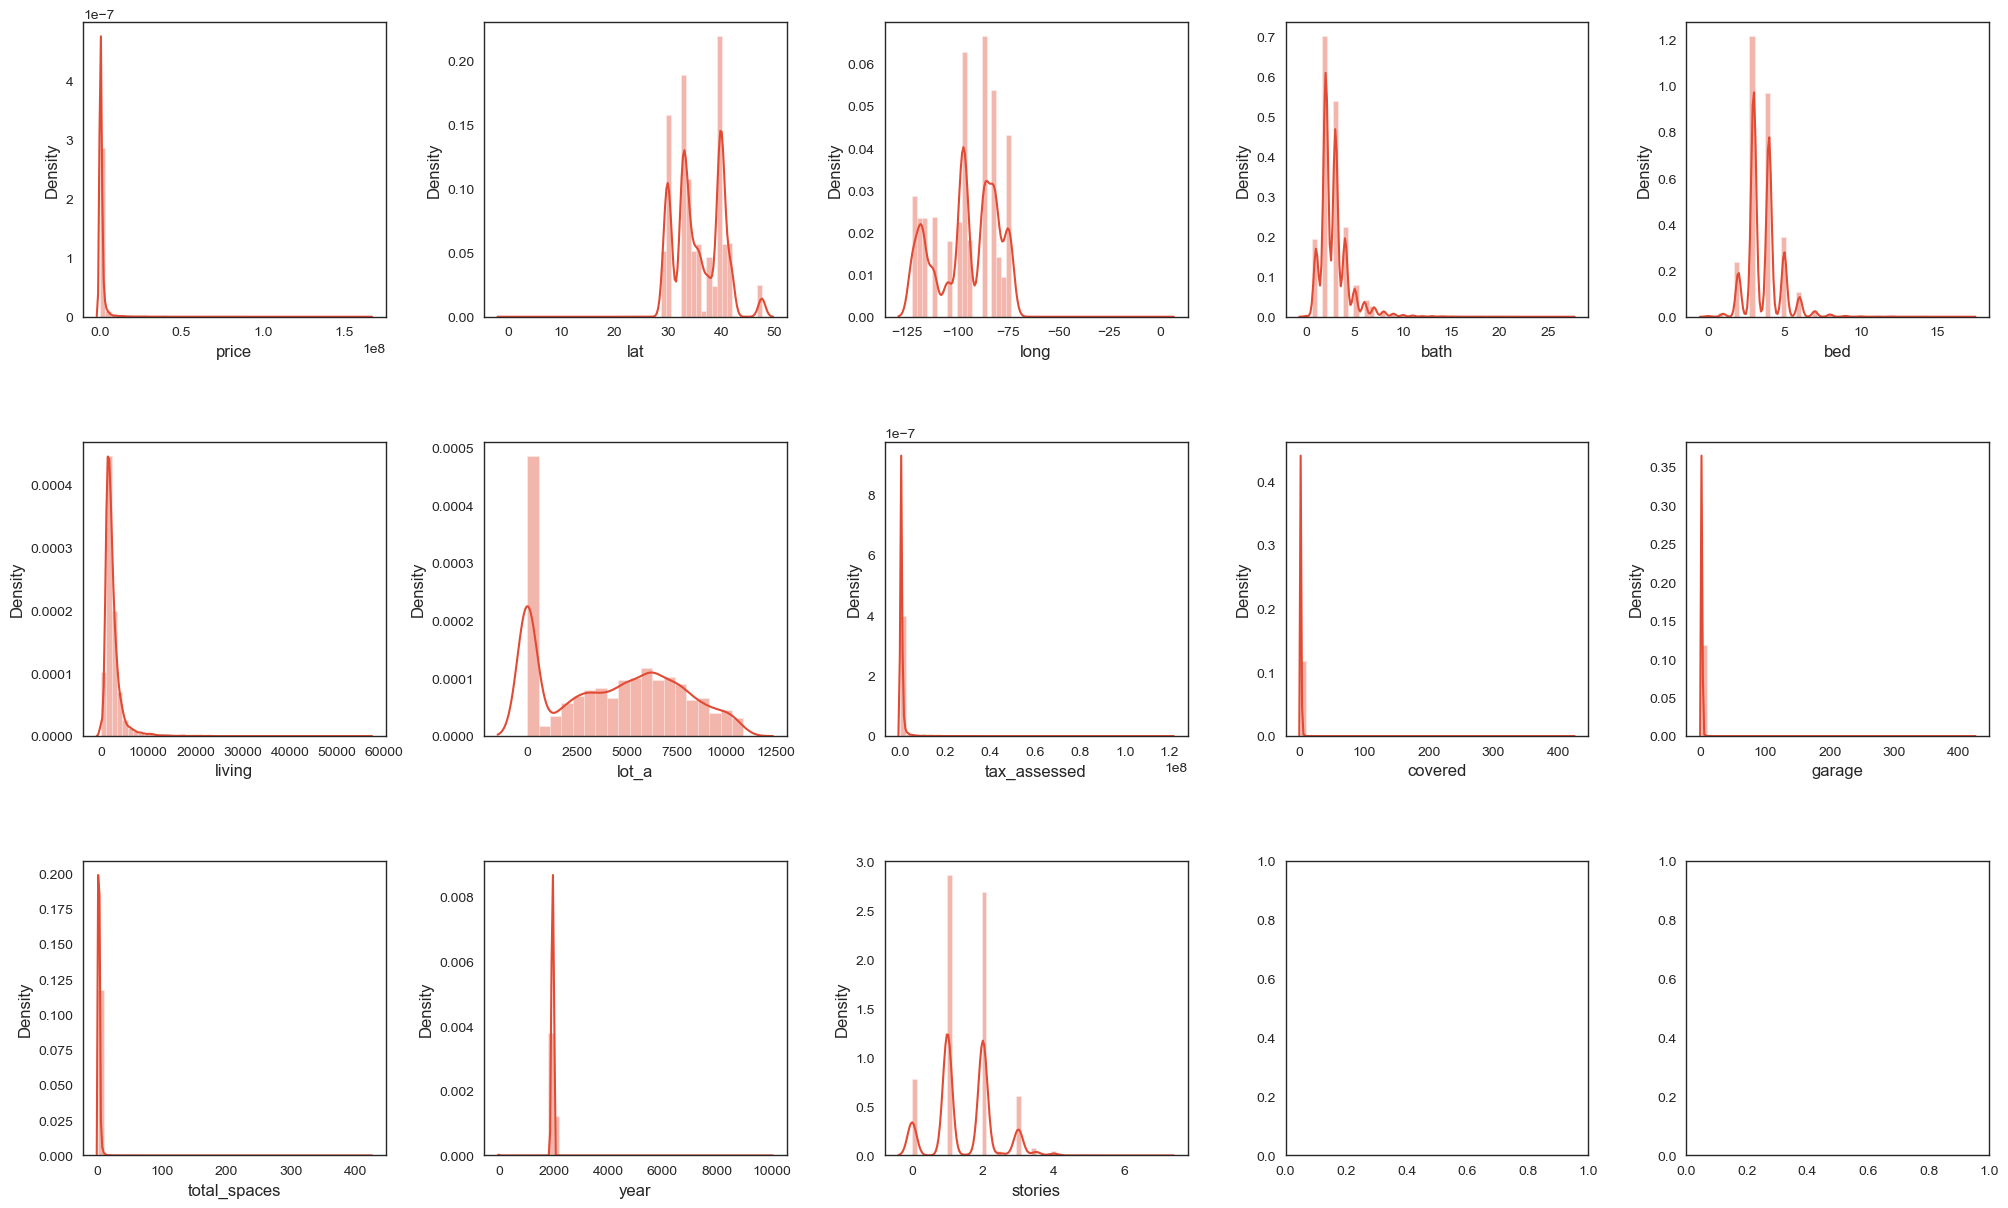

In [5]:
# Destiny
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize=(20, 12))
index = 0
axs = axs.flatten()
for k,v in df.select_dtypes(include=["number"]).items():
    sns.distplot(v, ax=axs[index])
    index += 1
    if index == 13:
        break
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show();

In [6]:
df.select_dtypes(include=["number"]).columns

Index(['price', 'lat', 'long', 'bath', 'bed', 'living', 'lot_a',
       'tax_assessed', 'covered', 'garage', 'total_spaces', 'year', 'stories'],
      dtype='object')

### price 

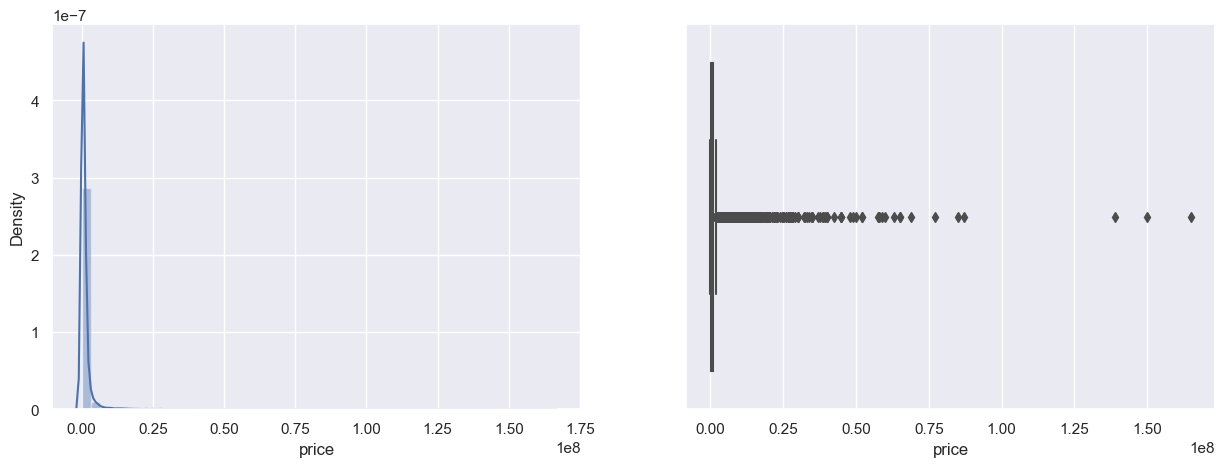

In [7]:
# Box Plot 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Total Room Visualize 
import seaborn as sns
sns.set_theme()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["price"],  ax=axs[0]);
sns.boxplot(df["price"],  ax=axs[1]);

In [8]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR   # ≥ 0 for this feature
    upper = Q3 + 1.5 * IQR
    return lower, upper

# OOP Inheritance
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lower = None
        self.upper = None

    def fit(self, df_col):
        self.lower, self.upper = find_boxplot_boundaries(df_col)
        return self

    def transform(self, df_col):
        return df_col.clip(self.lower, self.upper)

In [9]:
find_boxplot_boundaries(df["price"])

(-705280.0, 1999168.0)

In [10]:
# Limit price 4.000.000
df = df[df['price'] <= 4000000]
  
# Print the shape of the dataframe
print(len(df))

12704


### bath & bed

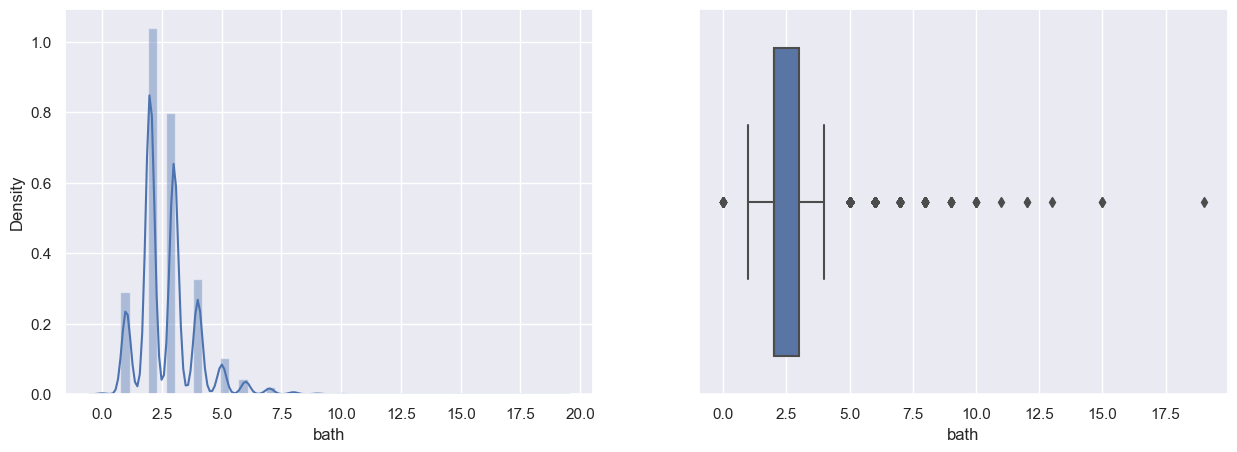

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["bath"],  ax=axs[0]);
sns.boxplot(df["bath"],  ax=axs[1]);

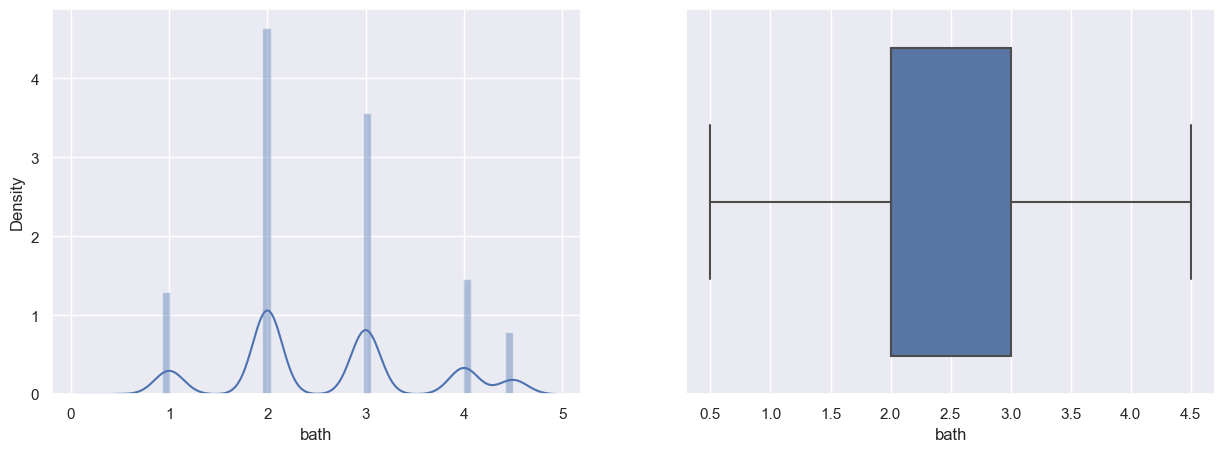

In [12]:
#clipped_total_rooms = BoxplotOutlierClipper().fit(df_housing["total_rooms"]).transform(df_housing["total_rooms"])
clipped_bath = BoxplotOutlierClipper().fit_transform(df["bath"])

# Plot new data (clipped)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(clipped_bath, ax = axs[0])
sns.boxplot(clipped_bath, ax = axs[1]);

# convert to df
df["bath"] = clipped_bath

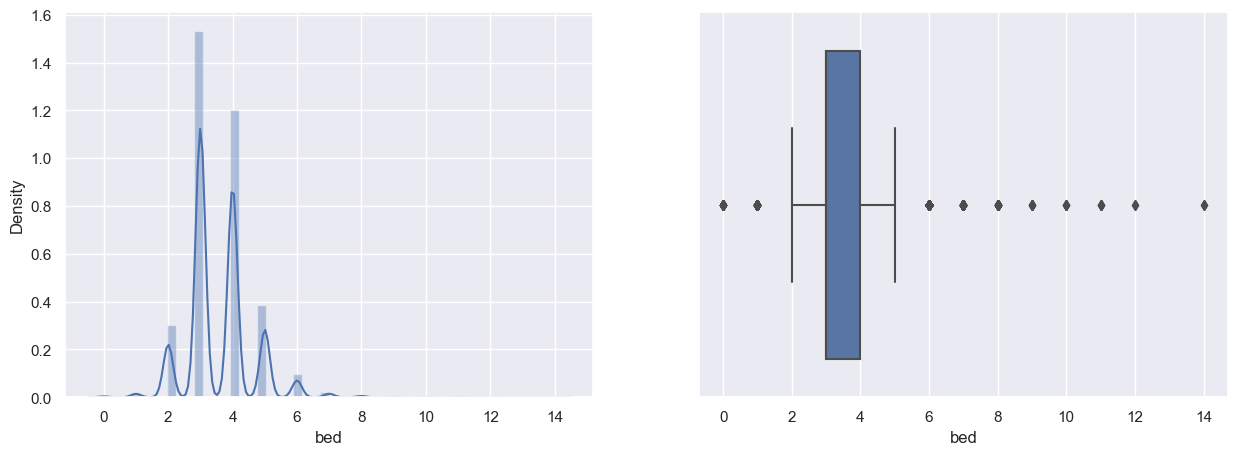

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["bed"],  ax=axs[0]);
sns.boxplot(df["bed"],  ax=axs[1]);

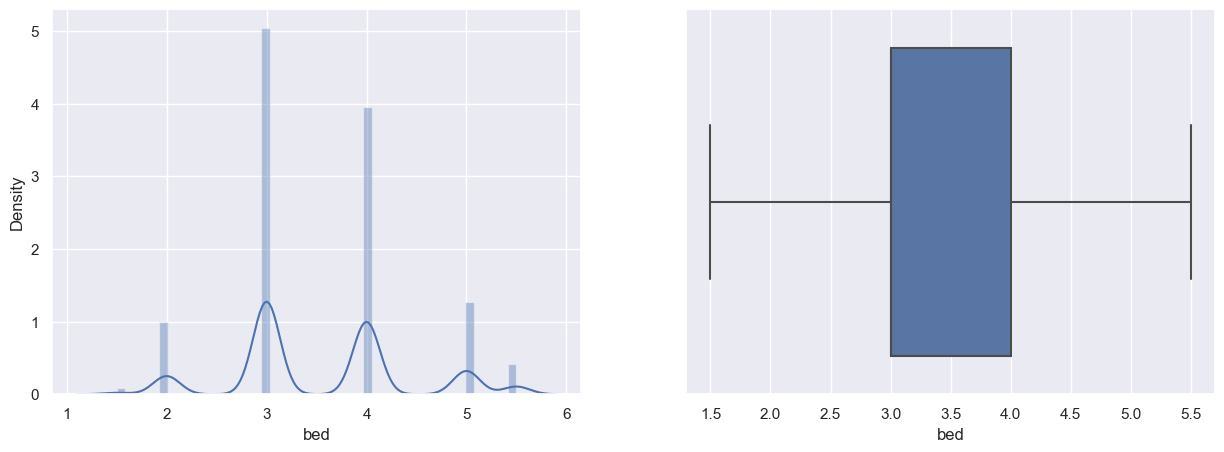

In [14]:
#clipped_total_rooms = BoxplotOutlierClipper().fit(df_housing["total_rooms"]).transform(df_housing["total_rooms"])
clipped_bed = BoxplotOutlierClipper().fit_transform(df["bed"])

# Plot new data (clipped)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(clipped_bed, ax = axs[0])
sns.boxplot(clipped_bed, ax = axs[1]);

df["bath"] = clipped_bed

### living

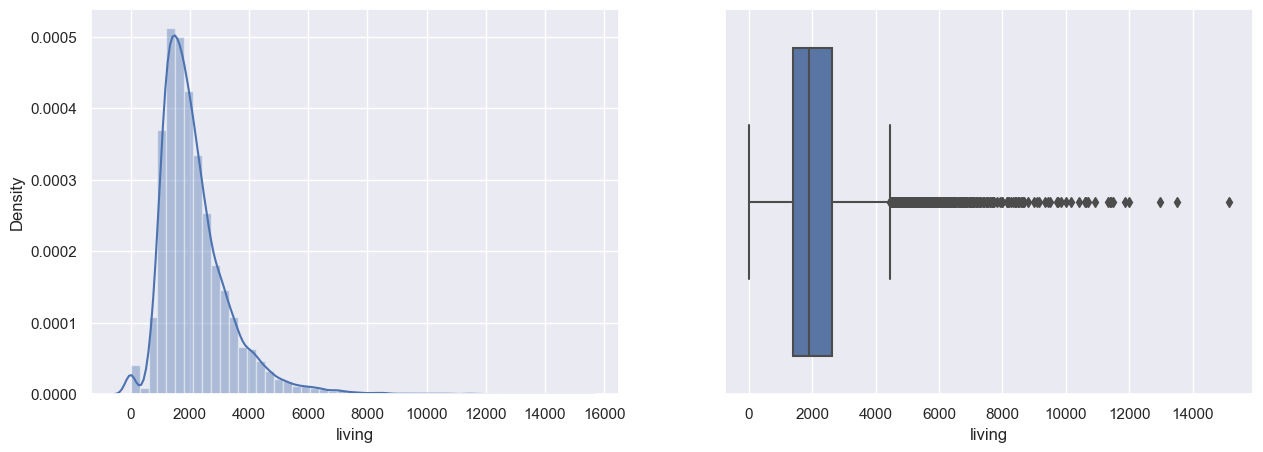

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["living"],  ax=axs[0]);
sns.boxplot(df["living"],  ax=axs[1]);

In [16]:
df = df[df['living'] <= 8000]
  
print(len(df))

12662


### tax 

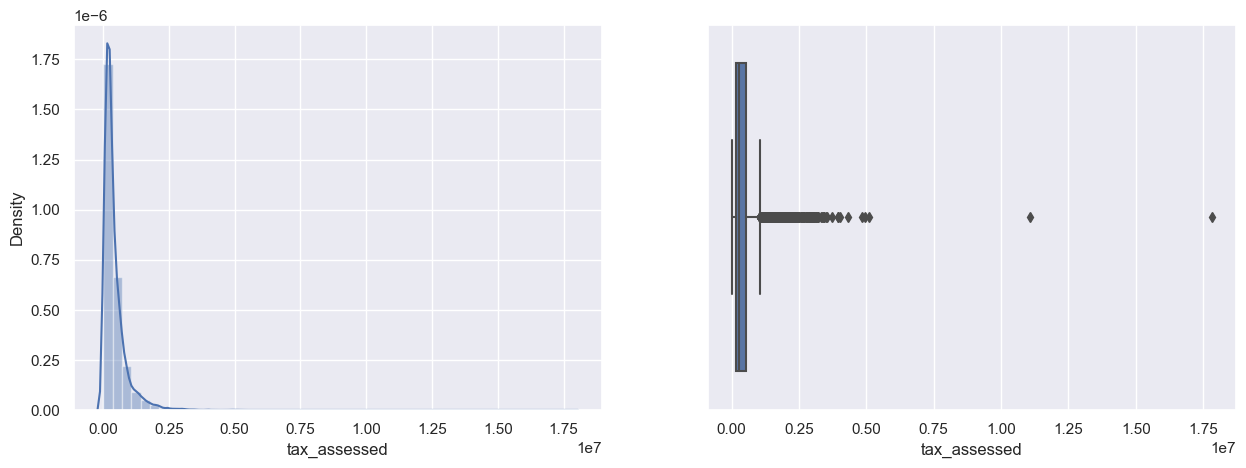

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["tax_assessed"],  ax=axs[0]);
sns.boxplot(df["tax_assessed"],  ax=axs[1]);

In [18]:
df = df[df['tax_assessed'] <= 2500000]
  
print(len(df))

12597


### covered

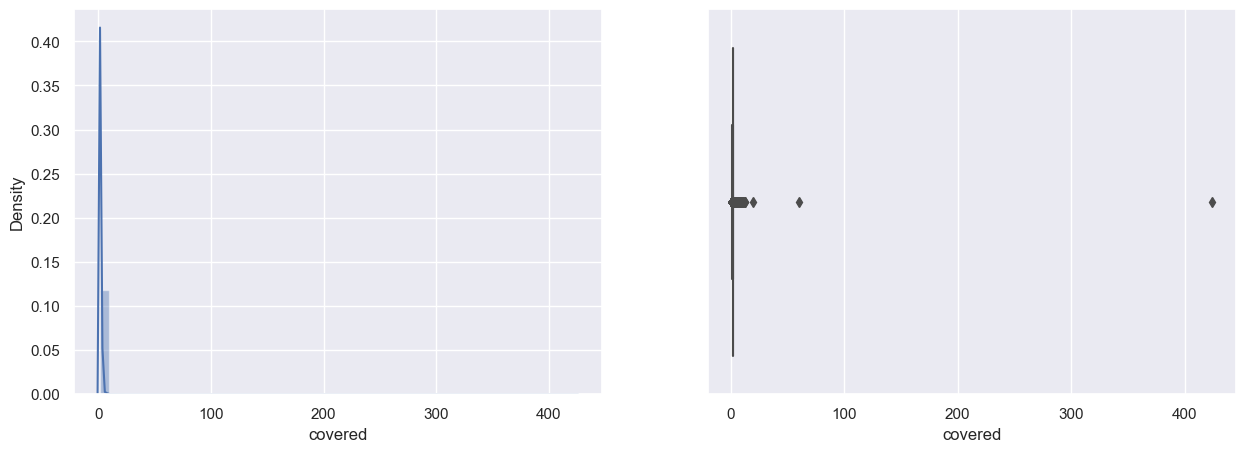

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["covered"],  ax=axs[0]);
sns.boxplot(df["covered"],  ax=axs[1]);

In [20]:
find_boxplot_boundaries(df["covered"])

(1.4, 2.36)

In [21]:
df = df[df['covered'] <= 5]
  
print(len(df))

12532


### garage

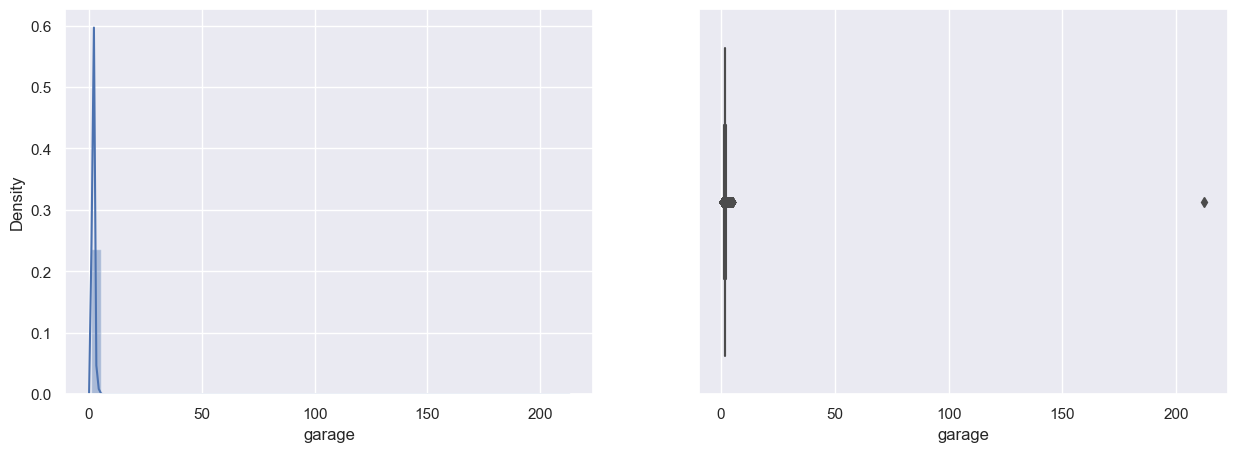

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["garage"],  ax=axs[0]);
sns.boxplot(df["garage"],  ax=axs[1]);

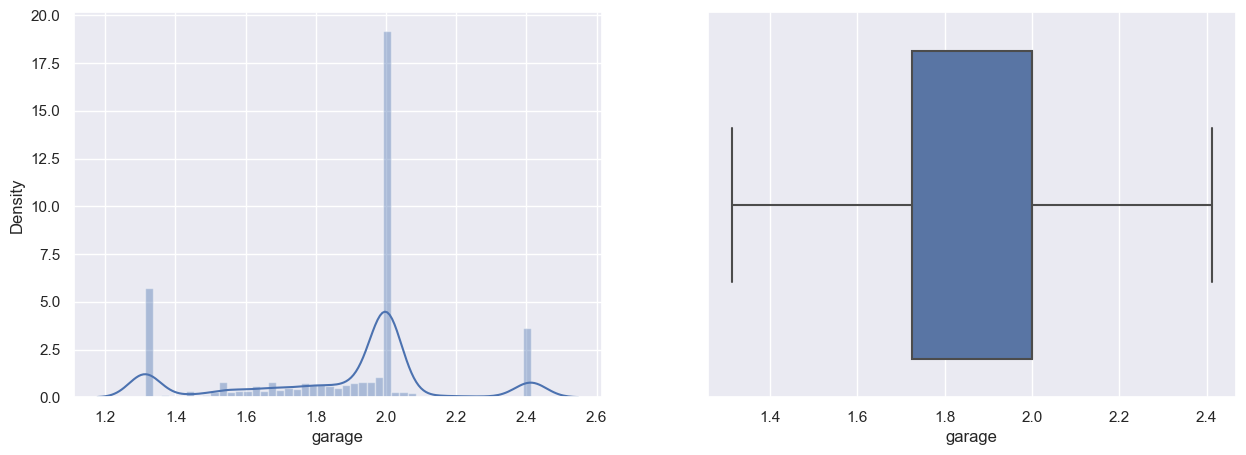

In [23]:
clipped_garage = BoxplotOutlierClipper().fit_transform(df["garage"])

# Plot new data (clipped)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(clipped_garage, ax = axs[0])
sns.boxplot(clipped_garage, ax = axs[1]);

df["garage"] = clipped_garage

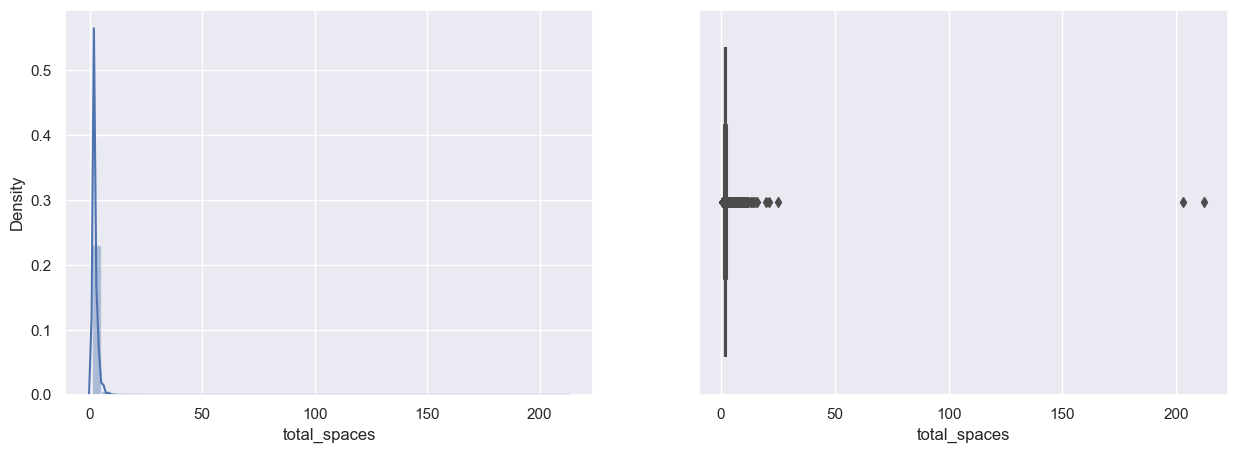

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df["total_spaces"],  ax=axs[0]);
sns.boxplot(df["total_spaces"],  ax=axs[1]);

## Categorical

### fireplace 

In [25]:
df["fireplace"].unique()

array(['none', 'pellet stoven', 'wood burning stoven', '1.0', '2.0',
       '3.0', 'family room', 'living room', 'non', 'decorative',
       'see remarks', 'great room', 'gas', 'dining room', 'electric',
       'fire pit', 'decorativ', 'rairsed heart', 'librar',
       'master bedroom', 'wood burning', 'bonus room', 'den', 'de',
       'outside', 'game room', '4.0', '5.0', '7.0', '6.0', '9.0', '8.0',
       'other (see remarks)', 'free standing', 'fire pi', 'see through',
       'marble', 'gas/propane', 'free standin', 'insert', 'other',
       'brick', 'not applicable', 'three', 'gas starte', 'bat',
       'see throug', 'gas starter', '1 fireplace', '2 or more fireplaces',
       'brick fireplace', 'family room/den/great room',
       '2 or more fireplace', 'family room/den/great roo',
       'tile fireplace', 'stone fireplace', 'gas log', 'vente',
       'primary bedroom', 'ventles', 'ventless', 'keeping room', 'vented',
       'kitchen', 'hearth room', 'wood burnin', 'other logcatio

In [26]:
def cus_fireplace(df):
    for i in list(df.index):
        if df.at[i, "fireplace"] in ["none", "1 fireplace"]:
            df.at[i, "fireplace"] = float(1)
        elif df.at[i, "fireplace"] == ["not applicable", "non"]:
            df.at[i, "fireplace"] = float(0)
        elif df.at[i, "fireplace"] in ["0.0",'1.0', '2.0', '3.0', '4.0', '5.0', '7.0', '6.0', '9.0', '8.0']:
            df.at[i, "fireplace"] = float(df.at[i, "fireplace"])
        elif df.at[i, "fireplace"] in ["2 or more fireplaces", "2 or more fireplace"]:
            df.at[i, "fireplace"] = float(2)
        elif df.at[i, "fireplace"] in ["2+ fireplace", "three"] :
            df.at[i, "fireplace"] = float(3)
        else:
            df.at[i, "fireplace"] = float(1)
    return df

cus_fireplace(df)

,price,status,add_attr,city,state,lat,long,bath,bed,living,lot_a,tax_assessed,fireplace,parking,covered,garage,total_spaces,lot_f,subtype,architectural,year,sewer,water,app,heating,cooling,stories,materials,roof,foundation,interior,compensation
0,274000,House for sale,True,South Ozone Park,NY,40.675730,-73.822350,3.0,3,1556,2400.00,0,1.0,Garage - Detached,1.750,1.5950,1.945,none,none,none,1930.0,none,none,none,none,none,0.0,none,none,none,none,none
1,270000,House for sale,True,Jamaica,NY,40.670036,-73.780450,4.0,4,1920,3998.00,678000,1.0,none,1.660,1.5350,2.160,none,none,none,1950.0,none,none,microwave,none,none,0.0,none,none,none,none,none
2,899000,House for sale,True,Staten Island,NY,40.524227,-74.215790,3.0,3,2532,6903.00,637000,1.0,Detache,1.935,2.0000,2.000,none,Single Family - Detached,Colonial,1899.0,Public Sewer,none,dishwasher,hot water,Units,2.0,none,none,none,none,none
3,1390000,House for sale,True,Flushing,NY,40.721615,-73.820755,4.0,4,1915,2697.00,894000,1.0,none,1.695,1.6550,3.915,none,none,none,1945.0,none,none,dryer,none,none,0.0,none,none,none,none,none
5,1380000,House for sale,True,Brooklyn,NY,40.604470,-73.943960,3.0,3,1800,2000.00,0,1.0,Shared Drivewa,1.700,1.3125,2.160,Near Public Transit,Single Family Residence,2 Story,1930.0,Public Sewer,Public,dishwasher,natural gas,Wall Unit(s),2.0,brick,none,none,Formal Dining Roo,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13333,3675000,House for sale,True,Nashville,TN,36.123570,-86.795580,5.0,5,5704,0.29,961800,1.0,Concrete Drivewa,1.905,1.8850,2.000,Unknown Soil Type,Single Family Residence,Traditional,1953.0,Public Sewer,Public,built-in microwave,central,Central A/,3.0,brick,Flat,slab,Dining Are,% Of Gross2.5
13334,750000,House for sale,True,Nashville,TN,36.160694,-86.847830,3.0,3,2208,4356.00,563900,1.0,Drivewa,1.570,1.6900,2.030,Unknown Soil Type,Single Family Residence,Colonial,1951.0,Public Sewer,Public,gas water heater,forced air,Central A/,3.0,brick,none,slab,none,% Of Gross2.5
13335,575000,House for sale,True,Nashville,TN,36.204834,-86.738660,4.0,4,3658,9147.60,0,1.0,On Stree,1.805,1.7800,2.000,Unknown Soil Type,Single Family Residence,Traditional,1940.0,Public Sewer,Public,dishwasher,forced air,Central A/,3.0,brick,none,slab,Kitchen - Gourme,% Of Gross3
13336,609000,House for sale,True,Nashville,TN,36.196106,-86.735115,3.0,3,1950,871.20,0,1.0,On Street,1.800,1.6850,2.520,Urban Land-Sassafras-Chillum,Single Family Residence,Colonial,1925.0,Public Sewer,Public,gas water heater,hot water,Ductless/Mini-Spli,3.0,brick,none,brick/mortar,Ceiling Fan(s),% Of Gross2.5


### drop city 

### parking

In [29]:
df["parking"].unique()

array([1.0, 0.0], dtype=object)

In [ ]:
def cus_parking(df):
    for i in list(df.index):
        if df.at[i, "parking"] in ["No Garag", 'No Garage', 'Contact manager', 'Garage: None Know', 'See Remarks',  'Uncovered Parking Spaces 2', 'See Remark', 'Non', 'None']:
            df.at[i, "parking"] = float(0)
        else:
            df.at[i, "parking"] = float(1)
    return df
cus_parking(df)

In [30]:
df.head()

,price,status,add_attr,city,state,lat,long,bath,bed,living,lot_a,tax_assessed,fireplace,parking,covered,garage,total_spaces,lot_f,subtype,architectural,year,sewer,water,app,heating,cooling,stories,materials,roof,foundation,interior,compensation
0,274000,House for sale,True,South Ozone Park,NY,40.675730,-73.822350,3.0,3,1556,2400.0,0,1.0,1.0,1.750,1.5950,1.945,none,none,none,1930.0,none,none,none,none,none,0.0,none,none,none,none,none
1,270000,House for sale,True,Jamaica,NY,40.670036,-73.780450,4.0,4,1920,3998.0,678000,1.0,1.0,1.660,1.5350,2.160,none,none,none,1950.0,none,none,microwave,none,none,0.0,none,none,none,none,none
2,899000,House for sale,True,Staten Island,NY,40.524227,-74.215790,3.0,3,2532,6903.0,637000,1.0,1.0,1.935,2.0000,2.000,none,Single Family - Detached,Colonial,1899.0,Public Sewer,none,dishwasher,hot water,Units,2.0,none,none,none,none,none
3,1390000,House for sale,True,Flushing,NY,40.721615,-73.820755,4.0,4,1915,2697.0,894000,1.0,1.0,1.695,1.6550,3.915,none,none,none,1945.0,none,none,dryer,none,none,0.0,none,none,none,none,none
5,1380000,House for sale,True,Brooklyn,NY,40.604470,-73.943960,3.0,3,1800,2000.0,0,1.0,1.0,1.700,1.3125,2.160,Near Public Transit,Single Family Residence,2 Story,1930.0,Public Sewer,Public,dishwasher,natural gas,Wall Unit(s),2.0,brick,none,none,Formal Dining Roo,none


### drop lot_f, architectural

In [36]:
df.head()

,price,status,add_attr,city,state,lat,long,bath,bed,living,lot_a,tax_assessed,fireplace,parking,covered,garage,total_spaces,lot_f,subtype,architectural,year,sewer,water,app,heating,cooling,stories,materials,roof,foundation,interior,compensation
0,274000,House for sale,True,South Ozone Park,NY,40.675730,-73.822350,3.0,3,1556,2400.0,0,1.0,1.0,1.750,1.5950,1.945,none,none,none,1930.0,none,none,none,none,none,0.0,none,none,none,none,none
1,270000,House for sale,True,Jamaica,NY,40.670036,-73.780450,4.0,4,1920,3998.0,678000,1.0,1.0,1.660,1.5350,2.160,none,none,none,1950.0,none,none,microwave,none,none,0.0,none,none,none,none,none
2,899000,House for sale,True,Staten Island,NY,40.524227,-74.215790,3.0,3,2532,6903.0,637000,1.0,1.0,1.935,2.0000,2.000,none,Single Family - Detached,Colonial,1899.0,Public Sewer,none,dishwasher,hot water,Units,2.0,none,none,none,none,none
3,1390000,House for sale,True,Flushing,NY,40.721615,-73.820755,4.0,4,1915,2697.0,894000,1.0,1.0,1.695,1.6550,3.915,none,none,none,1945.0,none,none,dryer,none,none,0.0,none,none,none,none,none
5,1380000,House for sale,True,Brooklyn,NY,40.604470,-73.943960,3.0,3,1800,2000.0,0,1.0,1.0,1.700,1.3125,2.160,Near Public Transit,Single Family Residence,2 Story,1930.0,Public Sewer,Public,dishwasher,natural gas,Wall Unit(s),2.0,brick,none,none,Formal Dining Roo,none


### sewer

In [37]:
df["sewer"].unique()

array(['none', 'Public Sewer', 'Municipal', 'Sewer', 'Septic Tank', 'Y',
       'Other', 'None', 'Private Sewer', 'Septic Type Unknown',
       'In Street', 'Unknown', 'In Street Paid', 'In Connected and Paid',
       'Public Sewe', 'Cesspool', 'Holding Tan', 'Sewer Connecte',
       'Cesspoo', 'Sewer Paid', 'In Stree', 'Private Sewe',
       'Sewer Connected', 'Septic-Mechanical', 'Sewer-Stor',
       'Sewer-Storm', 'Overhead Sewers', 'Shared Septic', 'Septic Tan',
       'Other Water/Sewe', 'Other Water/Sewer', 'MUD', 'Septic in & Cnct',
       'Septic in & Cnctd', 'Septic-In & Connectd', 'No Septic System',
       'Public Septic', 'On Site Septic', 'Public Septi',
       'No Septic Approved', 'On Site Septi', 'No Sewer System',
       'Public Hook/Up Avail', 'Sewer System', 'SAWS', 'SAW', 'Septic',
       'City', 'Cit', 'Saw', 'CITY', 'Aerobic Septic', 'saw', 'CIT',
       'LEON SPRING', 'City of SA', 'San Antonio', 'SEPTI', 'MJ Septi',
       'Septi', 'saws', 'Not Connected (at lot

In [38]:
df["water"].unique()

array(['none', 'Public', 'Municipal', 'See Remarks', 'None', 'Community',
       'Private', 'District', 'Other', 'In Street', 'Meter on Propert',
       'Water District', 'Public Utility', 'Othe', 'Distric', 'Privat',
       'Meter on Property', 'Lake Michiga', 'Lake Michigan',
       'Shared Well', 'Publi', 'Other Water/Sewer', 'Other Water/Sewe',
       'Well', 'MUD', 'City Franchise', 'Water System', 'SAWS', 'SAW',
       'Cit', 'City', 'Saw', 'Private Well', 'East Central', 'saw',
       'City of SA', 'saws', 'San Antoni', 'Atascosa', 'CITY',
       'Not Connected (at lot', 'Co-op Water', 'WEL', 'BEXAR ME',
       'Private Wel', 'City Water', 'Saws', 'Other/Remarks', 'City Wate',
       'Individual Water Meter', 'MUD Water', 'Master Water Meter',
       'Individual Water Mete', 'Meter on Sit', 'Meter on Site',
       'Water On Site', 'Municipal Utility District (MUD)',
       'Municipal Utility District (MUD', 'Wel', 'Cister', 'Central',
       'Co-op Wate', 'County Water', 'Commun

In [39]:
df["app"].unique()

array(['none', 'microwave', 'dishwasher', 'dryer', 'stoven',
       'range / oven', 'refrigerator', 'oven', 'indoor gridl', 'freeze',
       'gas water heater', 'trash compactor', 'cooktop',
       'stairnless steel appliance(s)',
       'energy star qualified refrigerator', 'stove', 'convection oven',
       'range hoo', 'range/oven', 'disposal', 'barbeque',
       '6 burner stove', 'built-in range', 'washer', 'gas oven',
       'gas cooking appliance', 'gas cooktop', 'free standing gas',
       'built-in gas', 'built-in', 'no cooking appliances',
       'vented exhaust fa', 'double oven', 'water heater',
       'built-in electric', 'gas & electric range', 'range',
       'electric cooktop', 'built-in and free standin',
       'gas/electric range', 'gas range', 'electric range',
       'bar ice make', 'water heater unit', '6 burner stoven',
       'free-standing range', 'high end refrigerator', 'humidifier',
       'freestanding oven', 'energy star qualified appliance',
       'electr

In [40]:
df["heating"].unique()

array(['none', 'hot water', 'natural gas', 'radian', 'other', 'baseboard',
       'heat pump', 'forced air', 'oil', 'steam', 'baseboar', 'gas',
       'electric', 'radiant', 'central', 'wall', 'fireplace(s',
       'wall furnace', 'flogor furnace', 'gravity', 'flogor furnac',
       'has heating (unspecified type)', 'see remarks', 'space heater',
       'energy star qualified equipment', 'fireplace(s)',
       'central heat/gas', 'combination', 'geothermal', 'radiator(s)',
       'radiator(s', 'propane', 'other-see remarks', 'window unit',
       'ceiling', 'wall/flogor heat', 'radiator', 'baseboard - hot water',
       '90% forced air', 'zone', 'baseboard - electric', 'non',
       'heat pump - electric backup', 'heat pump - gas backup',
       'programmable thermosta', 'active sola', 'ye', '3+ unit',
       'central electric', 'pane', '90% efficient furnace', '2 unit',
       '1 unit', 'wall heater', 'multiple heating unit',
       'other heat source (see remarks)', 'other/remark',
 

In [41]:
df["cooling"].unique()

array(['none', 'Units', 'Wall Unit(s)', 'Central', 'None', 'Central Air',
       'Window Unit(s)', 'Zoned', 'Other', 'Ductless', 'Wall',
       'Wall Unit(s', 'A/C Unit', 'Centra', 'Ductles', 'A/C Uni',
       'Central Ai', 'Zone', 'Central Air - Split', 'Air Conditionin',
       'Wall/Window Unit(s)', 'Air Conditioning', 'Ceiling Fan(s',
       'Window Unit(s', 'Ceiling Fan(s)', 'See Remarks', 'Attic Fa',
       'Evaporative Cooling', 'See Remark', 'Central Air/Refrig', 'Dual',
       'Non', 'Whole House Fans', 'Window/Wall Units - 2',
       'Window/Wall Unit - 1', 'Window/Wall Units - 3+', 'Space Pac',
       'Space Pa', 'Window/Wall Units - ', 'Partial', 'Ga', 'Electri',
       'Electric', 'Gas', 'Heat Pum', 'Central Electric', 'Refrigeration',
       'Programmable Thmsta', 'Refrigeratio', 'Othe', 'Both Refrig & Eva',
       'Refrigerator', 'Mini Spli', 'ENERGY STAR Qualified Equipmen',
       'Both Refrig & Evap', 'Evaporative Coolin', 'Central A/',
       'Ductless/Mini-Spli', 'C